In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [2]:
# Extract era geopotential height data
#files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/t/*/*')
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/z/*/*')
files.sort()
era_all = xr.open_mfdataset(files, combine='by_coords').z #.rename({"t":"temp"})

# Convert data to geopotential height by dividing by g.
g = 9.80665
era_all = era_all/g
#era_clim_hght = era_clim_hght/g

era_clim = era_all.groupby('time.month').mean()
era_clim_lon = era_clim.mean('longitude')

In [3]:
# Compute height anomaly in era data and adjust data.
# Use era_clim_lon to extract the temp/longitude anomaly dataset. 

era_anom = era_all.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim

era_anom = era_anom-era_anom.mean('longitude')

era_anom = era_anom.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

#era_anom_lon = era_anom_lon.rename({"latitude":"lat", "longitude":"lon", "level":"pfull"})

era_anom = StandardGrid(era_anom, lon_name='lon', lat_name='lat')

#era_anom_lon = StandardGrid(era_anom_lon, lon_name='lon', lat_name='lat')

era_anom_oct = era_anom.sel(time=slice('2019-10-01','2019-10-31'))

era_anom_aug = era_anom.sel(time='2019-08')

era_anom_OND = era_anom.sel(time=slice('2019-10-01','2019-12-31')).mean('time')

#era_anom['lon'] = (era_anom['lon'] + 180.0)

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/xarray/core/indexing.py:1361: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ... 

In [4]:
fig_era_hght_lon = plt.figure(figsize=(16,16))
fig_era_hght_lon_OND = plt.figure(figsize=(16,16))
fig_era_hght_lon_oct = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

<Figure size 1152x1152 with 0 Axes>

In [5]:
era_anom_aug_700 = era_anom_aug.sel(pfull=700.0, lat=slice(-90.0, 0.0))
era_anom_aug_700.load()

<xarray.DataArray 'z' (time: 1, lat: 361, lon: 1440)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [-0.17597246, -0.17597246, -0.17597246, ..., -0.19379473,
         -0.17597246, -0.17597246],
        [-0.21192884, -0.24781752, -0.26563978, ..., -0.17628431,
         -0.19410658, -0.21192884],
        ...,
        [ 3.4079294 ,  3.3000193 ,  3.4079294 , ...,  3.3183298 ,
          3.3363962 ,  3.282197  ],
        [ 3.4128933 ,  3.3589382 ,  3.4485378 , ...,  3.3770046 ,
          3.341116  ,  3.3770046 ],
        [ 3.4135942 ,  3.4314165 ,  3.4492388 , ...,  3.4314165 ,
          3.3598833 ,  3.4314165 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... -0.75 -0.5 -0.25 0.0
    pfull    int32 700
  * time     (time) datetime64[ns] 2019-08-01
    month    (time) int64 8

In [6]:
ax_era_lon = fig_era_hght_lon.add_subplot(1, 1, 1)
era_anom_aug_700.plot(ax=ax_era_lon)
ax_era_lon.set(title = 'era_hght_lon_anom')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_hght_lon.savefig('/home/561/gp8431/fig_era_hght_lon.png')

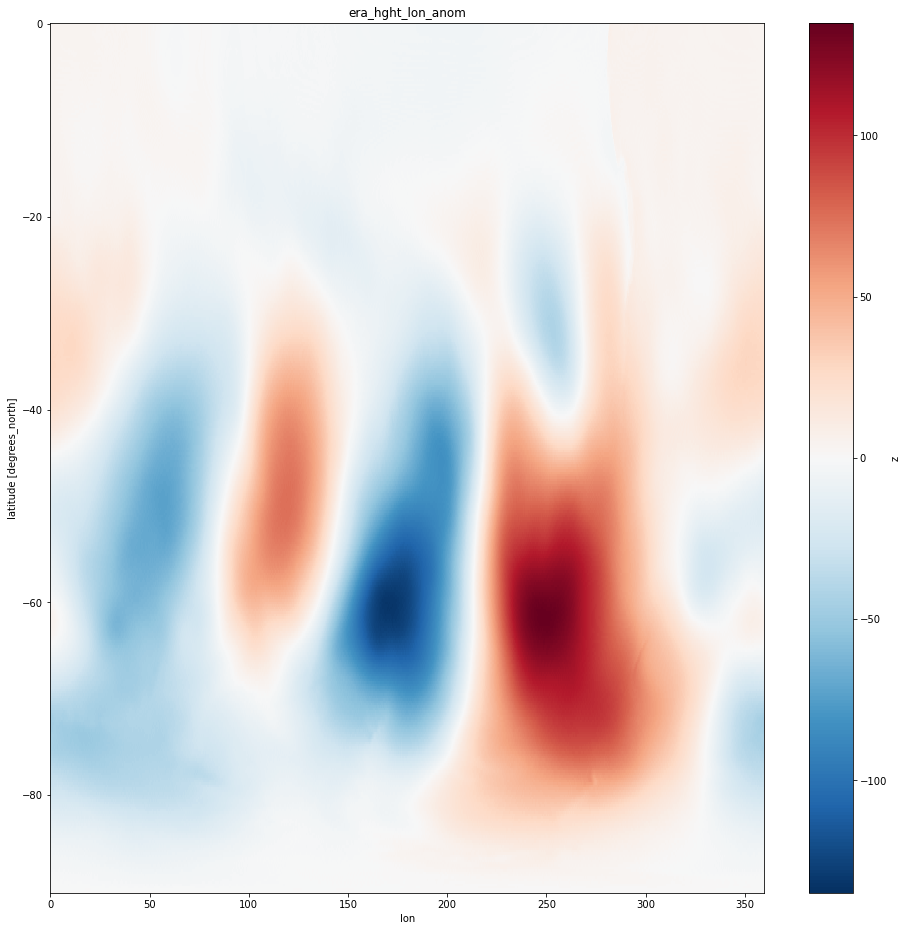

In [7]:
fig_era_hght_lon
#fig_era_temp_lon = Projection('EqualEarth', 1, 1, 'PlateCarree', True, None)
#fig_era_temp_lon.Projection('EqualEarth', 1, 1, 'PlateCarree', True, None)

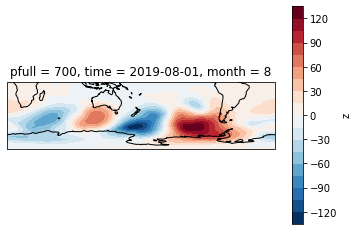

In [8]:
fig_proj, ax, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})#fig_proj,ax = Projection()
era_anom_aug_700.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', levels=21, **trans)
#ax.contourf(era_anom_lon_aug_700.lon, era_anom_lon_aug_700.lat, era_anom_lon_aug_700.squeeze().values, **trans)
fig_proj.savefig('/home/561/gp8431/fig_era_hght_lon_coast.png')

In [9]:
era_anom_OND_200 = era_anom_OND.sel(pfull=200.0, lat=slice(-90.0, 30.0))
era_anom_OND_200.load()

<xarray.DataArray 'z' (lat: 481, lon: 1440)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.29958978, -0.30024084, -0.30024084, ..., -0.31749344,
        -0.31163406, -0.31163406],
       [-0.38600287, -0.3801435 , -0.3801435 , ..., -0.6555341 ,
        -0.39186224, -0.38632837],
       ...,
       [11.062347  , 10.741058  , 10.196463  , ..., 12.206879  ,
        11.939626  , 11.367035  ],
       [11.273265  , 11.0346575 , 10.492665  , ..., 12.850413  ,
        12.052562  , 11.777496  ],
       [11.717486  , 11.425819  , 10.951861  , ..., 13.140663  ,
        12.698932  , 12.173541  ]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 29.25 29.5 29.75 30.0
    pfull    int32 200

In [10]:
# Here we will write code to plot the OND Z200 anomaly (height anomaly)
ax_era_lon_OND = fig_era_hght_lon_OND.add_subplot(1, 1, 1)
era_anom_OND_200.plot(ax=ax_era_lon_OND)
ax_era_lon_OND.set(title = 'era_hght_lon_anom_OND')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_hght_lon_OND.savefig('/home/561/gp8431/fig_era_hght_lon_OND.png')

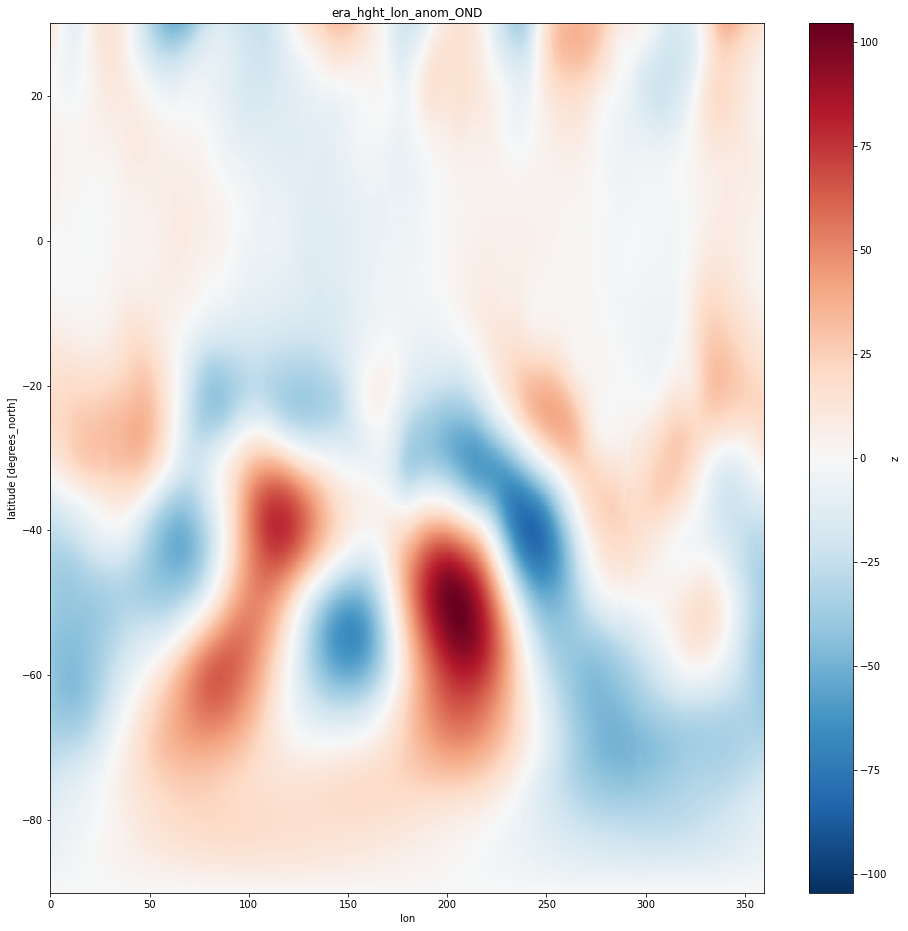

In [11]:
fig_era_hght_lon_OND

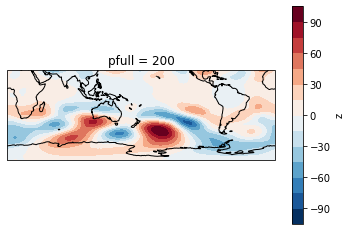

In [12]:
fig_proj_OND, ax, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})#fig_proj,ax = Projection()
era_anom_OND_200.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', levels=21, **trans)
fig_proj_OND.savefig('/home/561/gp8431/fig_era_hght_lon_OND_coast.png')

In [13]:
# Extract era_anom_oct for direct comparison with the model (day 288)
era_anom_oct_200 = era_anom_oct.sel(pfull=200.0, lat=slice(-90.0, 30.0))
era_anom_oct_200.load()

<xarray.DataArray 'z' (time: 1, lat: 481, lon: 1440)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.41804886,  0.4532051 ,  0.4532051 , ...,  0.40047073,
          0.40047073,  0.40047073],
        [ 1.3377342 ,  1.3553123 ,  1.3553123 , ...,  1.2840233 ,
          1.3191795 ,  1.3377342 ],
        ...,
        [28.976524  , 28.20504   , 26.785118  , ..., 31.92086   ,
         30.466759  , 29.695274  ],
        [29.435007  , 28.78657   , 27.34907   , ..., 32.414497  ,
         30.906687  , 30.188913  ],
        [29.966644  , 29.211761  , 28.492035  , ..., 32.85727   ,
         32.12094   , 30.648285  ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 29.25 29.5 29.75 30.0
    pfull    int32 200
  * time     (time) datetime64[ns] 2019-10-01
    month    (time) int64 10

In [14]:
# Here we will write code to plot the OND Z200 anomaly (height anomaly)
ax_era_lon_oct = fig_era_hght_lon_oct.add_subplot(1, 1, 1)
era_anom_oct_200.plot(ax=ax_era_lon_oct)
ax_era_lon_oct.set(title = 'era_hght_lon_anom_oct')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_hght_lon_oct.savefig('/home/561/gp8431/fig_era_hght_lon_oct.png')

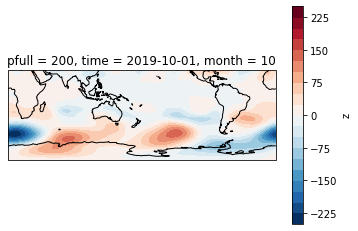

In [15]:
fig_proj_oct, ax, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})#fig_proj,ax = Projection()
#fig_proj_oct, ax, trans = Projection(projection='EqualEarth', nrows=2, ncols=1, transform='PlateCarree', coast=True, kw_args={'central_longitude': 180})
era_anom_oct_200.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', levels=21, **trans)
fig_proj_oct.savefig('/home/561/gp8431/fig_era_hght_lon_oct_coast.png')

In [16]:
era_anom_oct_200

<xarray.DataArray 'z' (time: 1, lat: 481, lon: 1440)>
array([[[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.41804886,  0.4532051 ,  0.4532051 , ...,  0.40047073,
          0.40047073,  0.40047073],
        [ 1.3377342 ,  1.3553123 ,  1.3553123 , ...,  1.2840233 ,
          1.3191795 ,  1.3377342 ],
        ...,
        [28.976524  , 28.20504   , 26.785118  , ..., 31.92086   ,
         30.466759  , 29.695274  ],
        [29.435007  , 28.78657   , 27.34907   , ..., 32.414497  ,
         30.906687  , 30.188913  ],
        [29.966644  , 29.211761  , 28.492035  , ..., 32.85727   ,
         32.12094   , 30.648285  ]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
  * lat      (lat) float32 -90.0 -89.75 -89.5 -89.25 ... 29.25 29.5 29.75 30.0
    pfull    int32 200
  * time     (time) datetime64[ns] 2019-10-01
    month    (time) int64 10

In [17]:
# This cell will make a plot of era_anom data in October 2019 at zero latitude for 
# all pressure levels and longitudes.
data = era_anom_oct.sel(lat=0.0, method="nearest")

In [18]:
data

<xarray.DataArray 'z' (time: 1, pfull: 37, lon: 1440)>
dask.array<getitem, shape=(1, 37, 1440), dtype=float32, chunksize=(1, 37, 1440), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float32 0.0 0.25 0.5 0.75 1.0 ... 359.0 359.25 359.5 359.75
    lat      float32 0.0
  * pfull    (pfull) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time     (time) datetime64[ns] 2019-10-01
    month    (time) int64 10

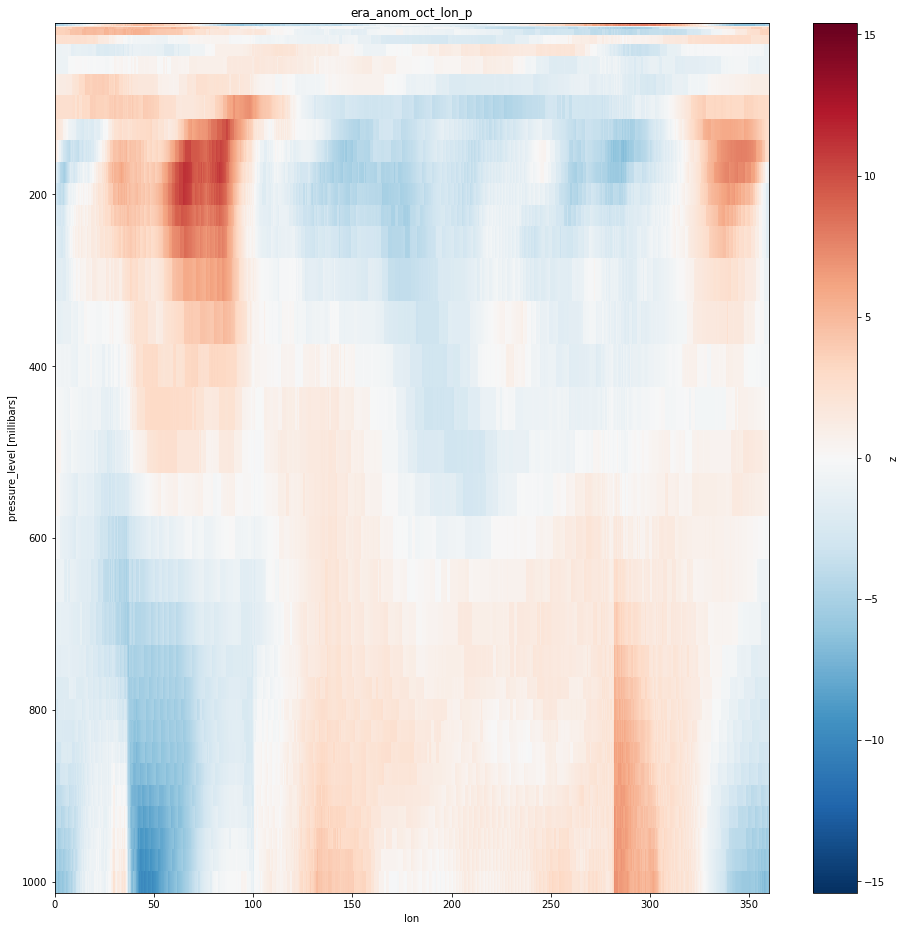

In [19]:
#fig_data, ax, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})#fig_proj,ax = Projection()
#fig_data = data.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', levels=21) #, **trans)

#fig_data.savefig('/home/561/gp8431/fig_era_hght_lon_p.png')

fig_data = plt.figure(figsize=(16,16))
ax_data = fig_data.add_subplot(1, 1, 1)
data.plot(ax=ax_data)
ax_data.set(title = 'era_anom_oct_lon_p')
ax_data.invert_yaxis()
#cbar_era = fig_era.colorbar(cax_era)
fig_data.savefig('/home/561/gp8431/era_hght_anom_oct_lon_p')

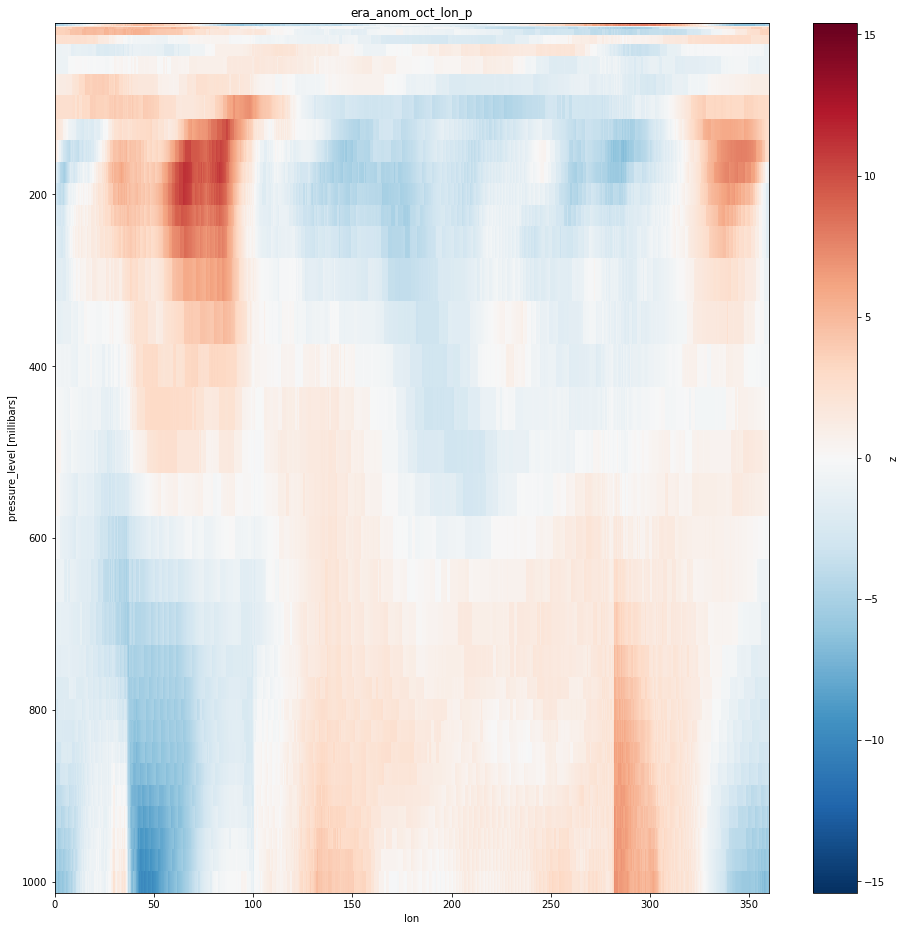

In [20]:
fig_data

<xarray.DataArray 'u' (time: 1, level: 37, latitude: 721)>
dask.array<mean_agg-aggregate, shape=(1, 37, 721), dtype=float32, chunksize=(1, 37, 721), chunktype=numpy.ndarray>
Coordinates:
  * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * level     (level) int32 1 2 3 5 7 10 20 30 ... 850 875 900 925 950 975 1000
  * time      (time) datetime64[ns] 2019-10-01


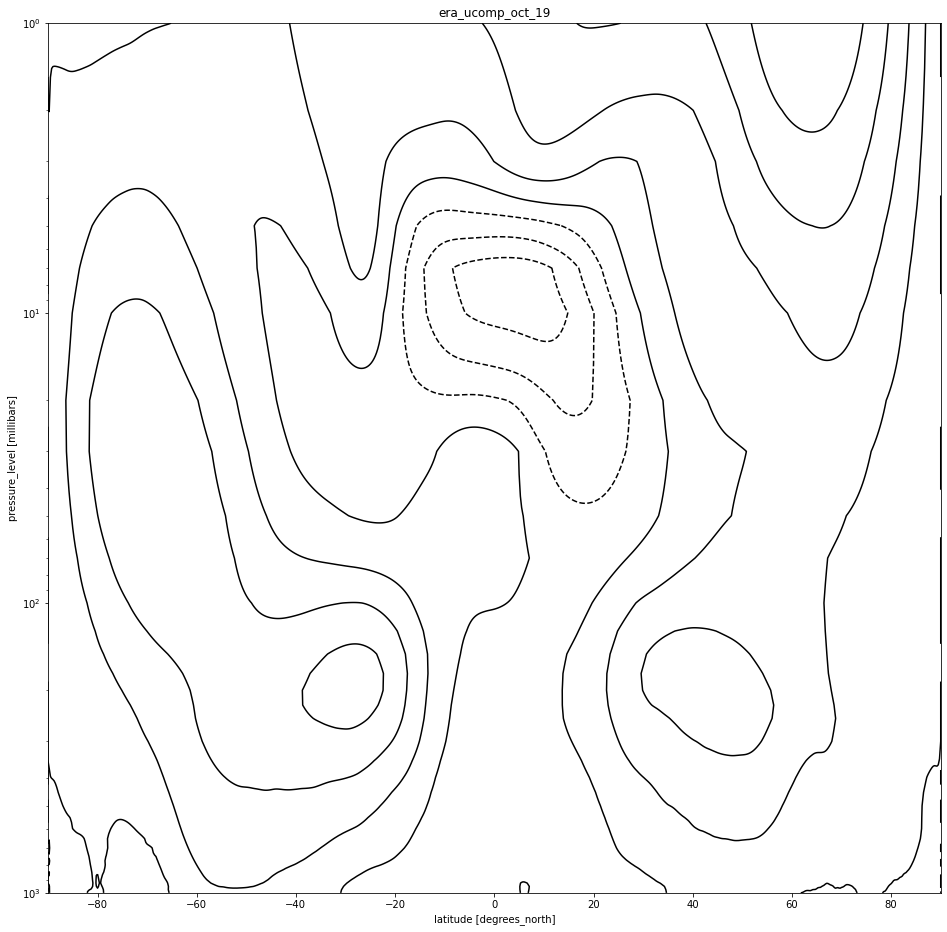

In [21]:
# MAKE A PLOT OF ERA OCT 2019 UCOMP LON_P W BLACK CONTOURS (NOT ANOM)

# Extract era ucomp data
files = glob('/g/data/rt52/era5/pressure-levels/monthly-averaged/u/*/*')
files.sort()
era_u = xr.open_mfdataset(files, combine='by_coords').u
data = era_u.sel(time=slice('2019-10-01', '2019-10-31')).mean('longitude')
print(data)

fig_era_u_oct_19 = plt.figure(figsize=(16,16))
ax_era_u_oct = fig_era_u_oct_19.add_subplot(1, 1, 1)
data.squeeze().plot.contour(ax=ax_era_u_oct, colors='black', levels=np.linspace(-100, 100, 21))
ax_era_u_oct.set(title = 'era_ucomp_oct_19')
ax_era_u_oct.invert_yaxis()
ax_era_u_oct.set_yscale('log')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_u_oct_19.savefig('/home/561/gp8431/fig_era_u_oct_19.png')